Epoch 1/5


C:\Users\MedNo\OneDrive\Escritorio\Carrera\Procesamiento de Datos\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7675 - loss: 0.6870
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8573 - loss: 0.3965
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8693 - loss: 0.3618
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3306
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8792 - loss: 0.3255
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8725 - loss: 0.3533
Resultado en las pruebas:  0.8691999912261963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicción: Sandalia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


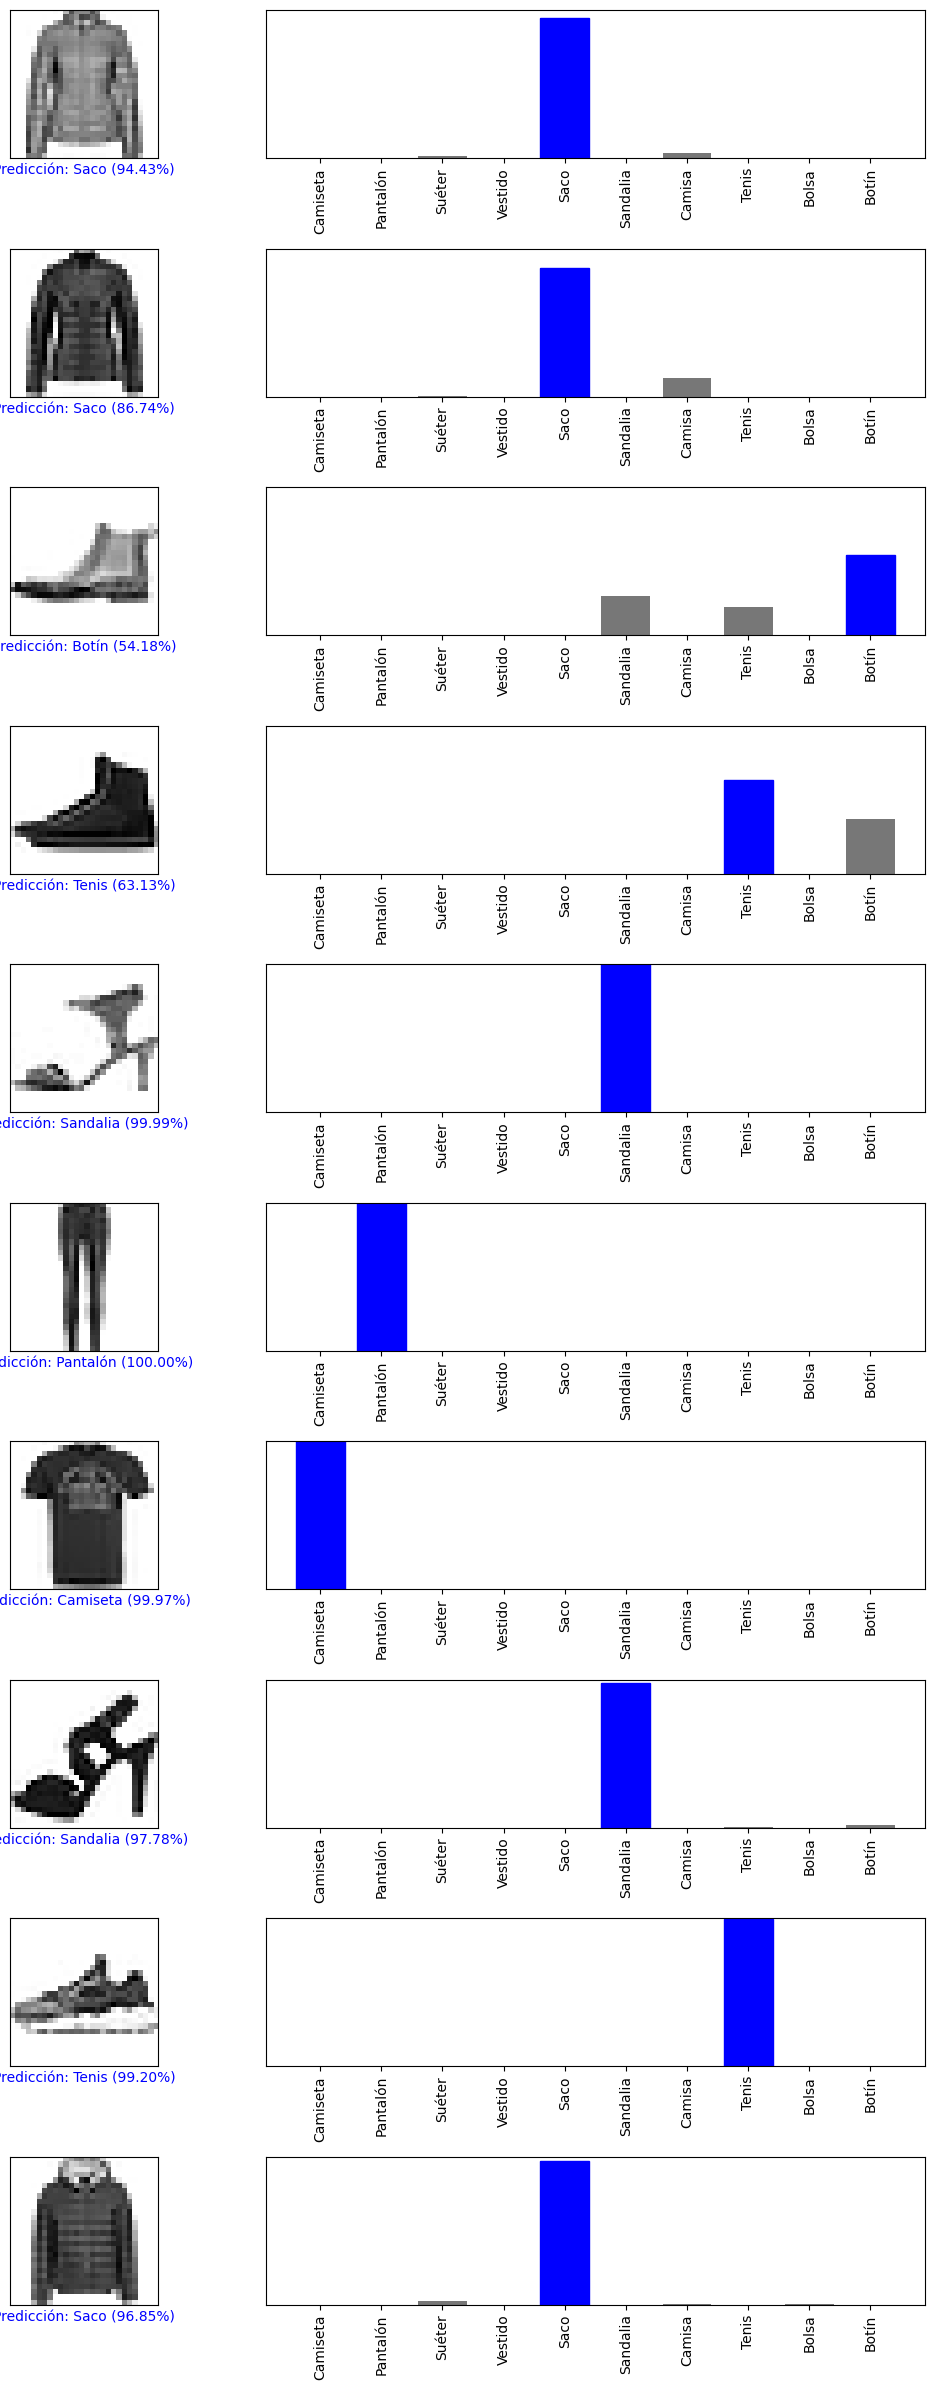

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import logging

# Configurar logging para evitar mensajes de error innecesarios
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Cargar el dataset fashion_mnist con metadatos
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

# Separar en conjuntos de entrenamiento y pruebas
train_dataset, test_dataset = dataset['train'], dataset['test']

# Obtener la cantidad de ejemplos de entrenamiento y pruebas de los metadatos
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

# Obtener los nombres de las clases del dataset fashion_mnist
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Saco',
               'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Botín']

# Normalizar los datos de las imágenes
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# Utilizar la memoria en lugar de disco para el entrenamiento más rápido
train_dataset = train_dataset.map(normalize).cache()
test_dataset = test_dataset.map(normalize).cache()

# Construir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),  # Capa de entrada
    tf.keras.layers.Dense(50, activation=tf.nn.relu),  # Capa oculta con 50 neuronas
    tf.keras.layers.Dense(50, activation=tf.nn.relu),  # Capa oculta con 50 neuronas
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Capa de salida para clasificación
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Establecer el tamaño del batch y entrenar el modelo
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Entrenar el modelo
model.fit(train_dataset, epochs=5,
          steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_dataset,
                                          steps=math.ceil(num_test_examples/BATCH_SIZE))
print('Resultado en las pruebas: ', test_accuracy)

# Probar una imagen suelta del conjunto de datos de prueba
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

# Predicción de una imagen específica
image_number = 4  # Puede cambiar este número para probar con diferentes imágenes
single_image = np.array([test_images[image_number]])
predictions_single = model.predict(single_image)
print("Predicción: " + class_names[np.argmax(predictions_single[0])])

# Función para graficar la imagen y su etiqueta correspondiente.
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% (Real: {})".format(class_names[predicted_label],
                                                100*np.max(predictions_array),
                                                class_names[true_label]),
               color=color)

# Función para graficar el array de valores de predicción.
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Visualización de las imágenes con las barras de predicción.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

# Obtener predicciones para un batch del conjunto de datos de prueba.
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

# Definir el número de imágenes que deseas mostrar
num_images_to_show = 10

# Ajustar el tamaño de la figura para que coincida con el tamaño que deseas
plt.figure(figsize=(12, 24)) # Ajusta los valores para cambiar el tamaño de la figura completa

for i in range(num_images_to_show):
    # Predicción de la imagen actual
    predictions_array, true_label, img = predictions[i], test_labels[i], test_images[i]
    predicted_label = np.argmax(predictions_array)
    
    # Crear una fila con dos columnas: una para la imagen y otra para la barra de predicción
    plt.subplot(num_images_to_show, 2, 2*i+1)  # Imagen
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)
    plt.xlabel(f"Predicción: {class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)",
               color='blue' if predicted_label == true_label else 'red')
    
    plt.subplot(num_images_to_show, 2, 2*i+2)  # Barra de predicción
    plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    plt.subplots_adjust(hspace=1)  # Ajustar el espacio entre subplots si es necesario
    
    # Resaltar la predicción y la etiqueta verdadera
    bar = plt.bar(range(10), predictions_array, color="#777777")
    bar[predicted_label].set_color('red')
    bar[true_label].set_color('blue')

# Mostrar la figura
plt.tight_layout()
plt.show()